# Toon Feedback Analysis

#### Load Dependencies

In [1]:
import nltk
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize

import pandas as pd

from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Load Data

In [3]:
df = pd.read_csv('../../toon_feedback.csv')

#### Tokenize Text

In [4]:
# tokens = word_tokenize()
df['feedback'].dropna(inplace=True)
tokens = df['feedback'].apply(word_tokenize)

#### Run Word2Vec

In [5]:
# size == dimensions
# window 10: 20 context words, 10 to the left and 10 to the right
model = Word2Vec(sentences=tokens, size=16, sg=1, window=10, min_count=5, seed=42, workers=2)

#### Explore the Model

In [22]:
model.most_similar('Waarom')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('heel', 0.9982264637947083),
 ('uur', 0.998160719871521),
 ('apparaat', 0.9980355501174927),
 ('maand', 0.9979389905929565),
 ('veel', 0.9979153275489807),
 ('huis', 0.9978872537612915),
 ('iets', 0.9978526830673218),
 ('duurt', 0.9978247880935669),
 ('vervangen', 0.9978152513504028),
 ('tweede', 0.9977284669876099)]

In [7]:
model.most_similar(positive=['droger', 'onzuinig'], negative=['A++'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('volgens', 0.9934536218643188),
 ('gebruikt', 0.9933327436447144),
 ('dezelfde', 0.9930551648139954),
 ('meer', 0.9926056861877441),
 ('Siemens', 0.9925239086151123),
 ('ik', 0.9924845695495605),
 ('degelijk', 0.9922384023666382),
 ('zuinig', 0.9917610883712769),
 ('wat', 0.9917236566543579),
 ('zegt', 0.9914828538894653)]

In [8]:
model.most_similar(positive=['koelkast','1'], negative=['koelkasten'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('vriezer', 0.9890153408050537),
 ('lager', 0.9889931678771973),
 ('verbruik', 0.9881815314292908),
 ('te', 0.9876009821891785),
 ('vaatwasser', 0.9872927665710449),
 ('ingevuld', 0.9872103333473206),
 ('wasmachine', 0.9871746301651001),
 ('zonder', 0.9870684146881104),
 ('en', 0.987014651298523),
 ('aan', 0.9869326949119568)]

#### Reduce word vector dimensionality with t-SNE

t-Distributed Stochastic Name Embedding

In [9]:
len(model.wv.vocab)

400

In [10]:
X = model[model.wv.vocab]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
tsne = TSNE(n_components=2, n_iter=250)

In [12]:
X_2d = tsne.fit_transform(X)

In [13]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [14]:
coords_df.head()

,x,y,token
0,2.272964,0.165535,Deze
1,-0.526294,-0.140893,droger
2,1.987803,-0.089416,is
3,-0.805704,0.255777,niet
4,0.267648,-0.186815,zuinig


In [15]:
coords_df.to_csv('toon_feedback_tsne.csv', index=False)

#### Visualise 2D representation of word vectors

In [16]:
coorrds_df = pd.read_csv('toon_feedback_tsne.csv')

In [17]:
coords_df.head()

,x,y,token
0,2.272964,0.165535,Deze
1,-0.526294,-0.140893,droger
2,1.987803,-0.089416,is
3,-0.805704,0.255777,niet
4,0.267648,-0.186815,zuinig


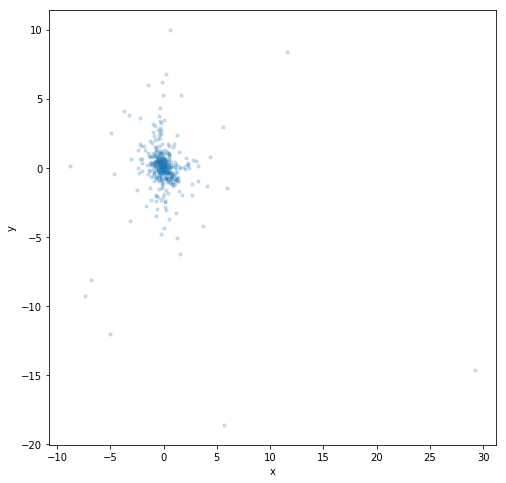

In [18]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8,8), marker='o', s=10, alpha=0.2)

In [19]:
output_notebook()

Loading BokehJS ...

In [20]:
p = figure(plot_width=600, plot_height=600)
p.text(x=coords_df.x, y=coords_df.y, text=coords_df.token)

GlyphRenderer(id='3b02a701-17c6-48fe-a9c8-0257a6c6535f', ...)

In [21]:
show(p)